In [17]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from operator import add
# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

#Image Loading
str1 = 'images/'
date = '25_03_19'
name = 'Cd_dots_osmotic_shock'
other = '/non_normalised/stage2/'# non_normalised for dots, dyeChannel for dyes
extension = '*.tif'

path = str1+date+'/'+name+other+extension

frames = pims.ImageSequence(path, as_grey=True)

/home/guest/miniconda3/lib/python2.7/site-packages/skimage/external/tifffile/tifffile.py:2546: UserWarning: unpack: string size must be a multiple of element size
  warnings.warn("unpack: %s" % e)


In [18]:
total_frames = len(frames)
pixel_size = 11
min_mass = 2000
frame_presistence = math.floor(total_frames*0.8)
allowed_walk_pixel = pixel_size

In [19]:
image1= np.int64(frames[0])
for frameNum in range(1, total_frames-1):
    image1 = image1-np.int64(frames[frameNum])

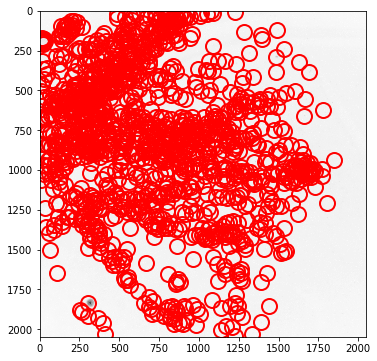

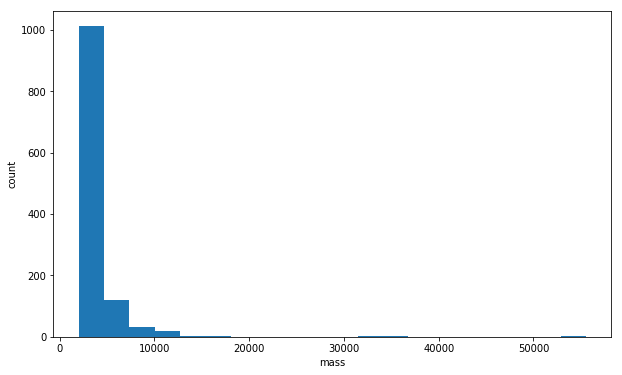

In [20]:
f = tp.locate(frames[0], pixel_size, invert=False, minmass=min_mass)
plt.figure()
tp.annotate(f, image1);

fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
ax.set(xlabel='mass', ylabel='count');

<Figure size 720x432 with 0 Axes>

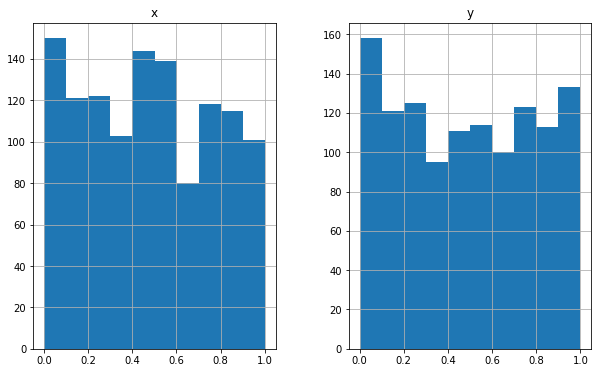

In [21]:
plt.figure()
tp.subpx_bias(f);

In [22]:
frames

<Frames>
Source: /home/guest/musParticleTracking/images/25_03_19/Cd_dots_osmotic_shock/non_normalised/stage2/*.tif
Length: 58 frames
Frame Shape: (2048, 2048)
Pixel Datatype: uint16

In [23]:
f = tp.batch(frames[:total_frames], pixel_size, minmass=min_mass, invert=False, engine='numba');

Frame 57: 316 features


In [24]:
t = tp.link_df(f, allowed_walk_pixel, memory=1)

Frame 57: 316 trajectories present


In [25]:
t1 = tp.filter_stubs(t, frame_presistence)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 10188
After: 44


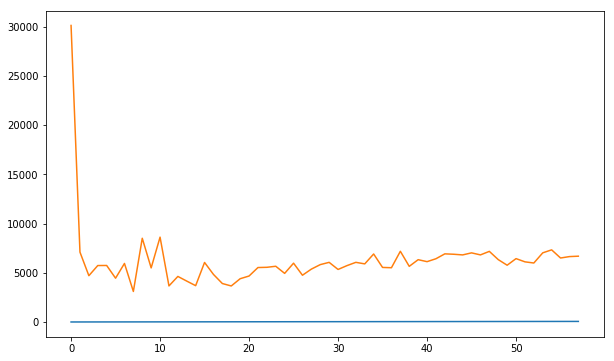

In [26]:
particles = t1.particle.unique()
noParticles = len(particles)

current_frame = t1.loc[t1['particle'] == particles[0]]
y_mass = current_frame["mass"].values

frame_index = np.linspace(0,total_frames-1,total_frames,dtype='int')
frame_intensity = [0] * total_frames
#overall_dict = dict.fromkeys(frame_index)
overall_dict = dict(zip(frame_index, frame_intensity))

for ind in range(1, noParticles):
    #Fetching the current frame information for a particle and all the frame detail for that particle
    current_frame = t1.loc[t1['particle'] == particles[ind]]
    #This then collects all the mass values for the particles
    current_P_Intensity = current_frame["mass"].values
    #This then collects all the mass values for the particles
    current_P_Frame = current_frame["mass"].values
    frame_info = len(current_frame["frame"].values)
    for ind2 in range(0,frame_info):
        overall_dict[current_frame["frame"].values[ind2]] = (overall_dict[current_frame["frame"].values[ind2]] + current_P_Frame[ind2])/2
        
fig = plt.figure()
ax = plt.axes()
ax.plot(overall_dict.keys(), overall_dict.items());

In [20]:
ax.plot(overall_dict.keys(), overall_dict.items());

In [21]:
for ind in range(1, noParticles):
    #Fetching the current frame information for a particle and all the frame detail for that particle
    current_frame = t1.loc[t1['particle'] == particles[ind]]
    #This then collects all the mass valyes for the particles
    current_numpy = current_frame["mass"].values
    #Need to sum the correct frames. Particle X may have been tracked for 100 frames (200-300) but Y from (100-200)
    y_mass = y_mass+current_numpy
    
x_frame = np.linspace(0, total_frames-1, num=total_frames)
y_mass = y_mass/total_frames

fig = plt.figure()
ax = plt.axes()
ax.plot(x_frame, y_mass);

ValueError: operands could not be broadcast together with shapes (148,) (98,) 

In [ ]:
particles = t1.particle.unique()
noParticles = len(particles)
for ind in range(0, noParticles):
    plotFig = t1.loc[t1['particle'] == particles[ind]].plot(x='frame',y='mass')
    fig = plotFig.get_figure()
    fig.savefig(str(particles[ind])+'.png', bbox_inches='tight')
    plt.close('all')

In [ ]:
for frameNum in range(0, total_frames):
    plotFig = tp.annotate(t1[t1['frame'] == frameNum], frames[frameNum])
    fig = plotFig.get_figure()
    fig.savefig(str(frameNum)+'.png', bbox_inches='tight')
    plt.close('all')

In [6]:
print(frames[0][0][0])

16
